# Credit risk analysis

We start by reading our data. 

In [2]:
import pandas as pd

df = pd.read_csv('/home/abatsis/Downloads/credit risk imputed.csv')
print(df)

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]


Next suffle the data,

In [3]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)
print(df)

      clientid        income        age          loan  default
0         1853  42465.669748  58.016570   7314.976322        0
1          362  66091.905911  24.204141   8743.509701        1
2         1744  45215.014687  27.838848    383.850167        0
3          838  24994.778195  34.723360     51.640260        0
4          442  60929.172351  60.058778  11146.074460        0
...        ...           ...        ...           ...      ...
1995      1916  48015.554743  28.241796     54.008242        0
1996       498  58684.513012  31.732265   5415.817417        0
1997      1591  65688.731503  24.564475   3673.870415        0
1998       131  60119.065810  45.076969   1810.960460        0
1999      1952  51650.271371  40.105057   3743.003437        0

[2000 rows x 5 columns]


So that we can split in to test and train data frames. 

In [4]:
df_train = df.iloc[0:1400]
df_test = df.iloc[1401:2000]
df_test = df_test.reset_index(drop=True)

x = df_train.iloc[:,1:4]
y = df_train['default']
x_test = df_test.iloc[:,1:4]
y_test = df_test['default']



We import/define our metrics. 

In [5]:

from scipy.stats import ks_2samp

def ks_statistic(a, b):
    return ks_2samp(b[a==1], b[a!=1]).statistic





We build our logistic regression model. 

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')
model.fit(x,y)



LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

We use the model to make predictions on the test dataset.

In [7]:
results = model.predict(x_test)
results_proba = model.predict_proba(x_test)

Bellow we see the confusion matrix of our results.

In [8]:
from sklearn.metrics import confusion_matrix

cm_metric = confusion_matrix(y_test, results)
print(cm_metric)

[[499  17]
 [ 18  65]]


Similarly we get the ks statistic.

In [9]:
from scipy.stats import ks_2samp

def ks_statistic(a, b):
    return ks_2samp(b[a==1], b[a!=1]).statistic

ks_metric = ks_statistic(df_test['default'], results)
print(ks_metric)

0.7501867936863734


Finally we plot the roc curve. 

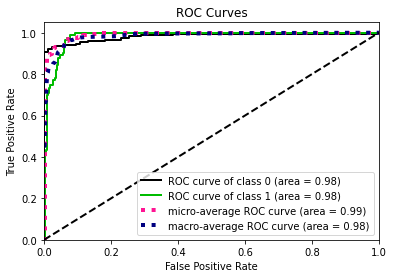

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt

results_proba = model.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, results_proba)
plt.show()

Below we build our random forest model while at the same time we tune the number of features hyperparameter. Then we check the same metrics we used for the logistic refression.

In [14]:
scores = []
models = []
for i in range(3):
    model = RandomForestClassifier(n_estimators=1000, max_features=i+1)
    model.fit(x,y)
    models.append(model)
    results = model.predict(x_test)
    ks_metric = ks_statistic(y_test, results)
    scores.append(ks_metric)

max_sc = max(scores)
optimal_model = scores.index(max_sc)
fmodel = models[optimal_model]

Confusion matrix:

In [16]:
fresults = fmodel.predict(x_test)
fcm_metric = confusion_matrix(y_test, fresults)
print(fcm_metric)

[[513   3]
 [  2  81]]


Ks stastisric:

In [17]:
fks_metric = ks_statistic(df_test['default'], fresults)
print(fks_metric)

0.9700896609694593


Roc curve:

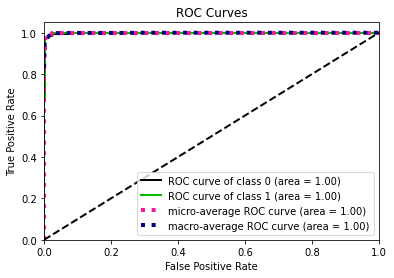

In [18]:
fresults_proba = fmodel.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, fresults_proba)
plt.show()

We can clearly see that the random forest model perfoms better than the logistic regression model. 